# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# White wine quality dataset

In [3]:
df_vin = pd.read_csv('/content/drive/MyDrive/ML/winequality-white.csv', sep=';')

In [4]:
df_vin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_vin.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df_vin['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

In [7]:
y_df = df_vin['residual sugar']

In [8]:
df_vin.drop('residual sugar', axis=1, inplace=True)

In [9]:
col = list(df_vin.columns)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_vin, y_df, test_size=0.30, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3428, 11)
(1470, 11)
(3428,)
(1470,)


In [12]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [13]:
reg.score(X_test, y_test)

0.9305379654390447

In [14]:
reg.intercept_

-2274.7239488157106

In [15]:
reg.coef_

array([-1.84176420e+00, -7.63121029e-01, -5.00895566e-01, -1.42841839e+01,
        1.96432313e-02, -5.88758817e-03,  2.31328331e+03, -8.96284930e+00,
       -3.73409965e+00,  2.29969207e+00,  2.81843319e-01])

In [16]:
y_pred = reg.predict(np.array([[ 7,0.27,0.36,0.045,45.0,170.0,1.0010,3,0.45,8.8,6]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
y_pred

array([20.19365855])

# Corona dataset

In [18]:
df_corona = pd.read_csv("/content/drive/MyDrive/ML/data_corona.csv")

In [19]:
df_corona.head()

,id,diagnostic_corona,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,...,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df_corona.set_index('id', inplace=True)

In [21]:
df_corona.drop('Unnamed: 32', axis=1, inplace=True)

In [22]:
df_corona['diagnostic_corona'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnostic_corona, dtype: object

In [23]:
df_corona.value_counts('diagnostic_corona')

diagnostic_corona
B    357
M    212
dtype: int64

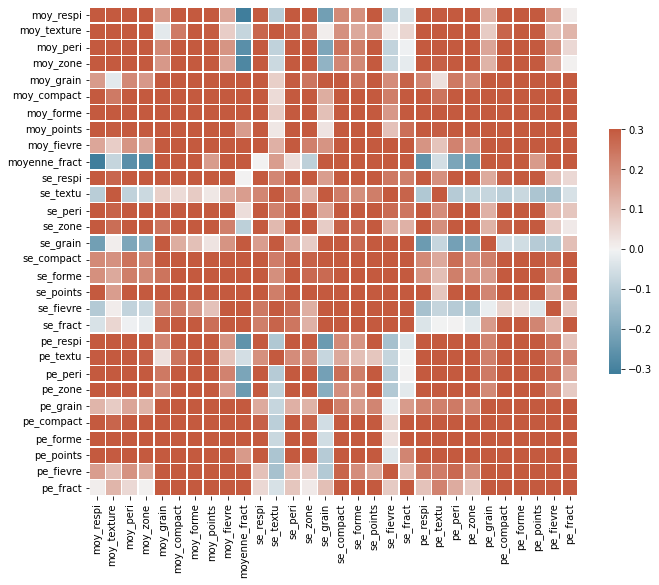

In [24]:
corr = df_corona.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Enlève la col diag corona
df_diag_corona = df_corona['diagnostic_corona']
df_corona.drop('diagnostic_corona', axis=1, inplace=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_corona, df_diag_corona, test_size=0.30, random_state=2042)

In [27]:
X_train.head()

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
id,,,,,,,,,,,,,,,,,,,,,
87163,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,...,17.98,29.87,116.6,993.6,0.1401,0.1546,0.2644,0.11600,0.2884,0.07371
866458,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,16.11,18.33,105.9,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779
913505,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,0.06115,...,23.96,30.39,153.9,1740.0,0.1514,0.3725,0.5936,0.20600,0.3266,0.09009
923780,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,...,12.02,28.26,77.8,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032
9110732,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.4,1437.0,0.1401,0.3762,0.6399,0.19700,0.2972,0.09075


In [28]:
scaler = StandardScaler()

In [29]:
normalized = scaler.fit_transform(X_train)

In [30]:
normalized_test = scaler.transform(X_test)

In [31]:
df_normalized = pd.DataFrame(normalized, columns=X_train.columns)

In [32]:
df_normalized

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
0,-0.218629,0.070836,-0.273207,-0.271782,-0.451081,-0.795598,-0.393774,-0.399236,-0.817631,-0.898089,...,0.336185,0.713517,0.255651,0.186831,0.310646,-0.638638,-0.059763,-0.004930,-0.070266,-0.575806
1,0.257097,-0.727137,0.292205,0.040369,1.234430,1.387941,0.272416,0.875012,0.617871,0.252368,...,-0.054749,-1.270299,-0.064209,-0.224270,0.246059,0.197925,-0.378113,0.387147,-0.547042,-0.353476
2,1.493414,-0.128658,1.465825,1.449483,0.815115,0.722612,1.621204,1.726677,-0.016172,-0.256377,...,1.586337,0.802909,1.370678,1.515169,0.797200,0.724766,1.472414,1.336779,0.549217,0.316783
3,-0.873820,0.762905,-0.863721,-0.806816,-0.095007,-0.442362,-0.518519,-0.694543,0.721170,0.375218,...,-0.909787,0.436745,-0.904215,-0.804439,-1.041370,-0.490972,-0.562422,-0.778201,0.391914,-0.215610
4,1.011991,2.139654,1.021396,0.919026,0.201264,0.474272,0.948017,0.814750,-0.407997,-0.543991,...,1.078332,2.203958,1.116583,0.975932,0.310646,0.747917,1.687905,1.202608,0.072442,0.352748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.611743,-1.160604,-0.594183,-0.603961,0.416421,-0.275937,-0.305222,-0.571519,-0.543354,-0.360438,...,-0.546030,-0.862878,-0.543102,-0.544609,0.711084,-0.256960,0.129199,-0.758076,-0.292437,-0.069025
394,1.524749,2.321907,1.692154,1.563928,-0.305352,1.862382,1.051770,1.601653,0.233170,-0.087277,...,1.814208,1.813727,2.109046,1.846186,-0.206048,1.728391,0.688174,1.159376,-0.177297,0.884051
395,-0.967825,0.649612,-0.974828,-0.859747,-0.620870,-0.896602,-0.664497,-0.907834,0.671301,-0.455828,...,-0.755086,1.086557,-0.728142,-0.710295,-0.111321,-0.544782,-0.393472,-0.618389,0.061090,-0.417233
396,-0.042012,1.922921,-0.045232,-0.171642,0.154521,0.125855,-0.562192,-0.182693,-1.034916,-0.175440,...,-0.224085,1.280813,-0.234601,-0.323753,-0.378279,-0.189384,-0.673192,-0.171898,-1.098414,-0.058126


In [33]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [34]:
neigh.fit(df_normalized, y_train)

KNeighborsClassifier()

In [35]:
y_pred1 = neigh.predict(normalized_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [36]:
y_pred1

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M'], dtype=object)

In [37]:
neigh.predict_proba(normalized_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0. ,

In [38]:
# Faire le test pour k=(1 à 8)

In [39]:
for i in range(1,9):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(df_normalized, y_train)
  y_pred = neigh.predict(normalized_test)
  print(i, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

1 0.9649122807017544
2 0.9766081871345029
3 0.9766081871345029
4 0.9766081871345029
5 0.9883040935672515
6 0.9883040935672515
7 0.9883040935672515
8 0.9824561403508771


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


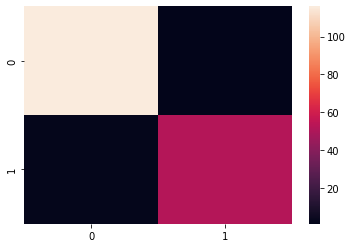

In [40]:
# Matrice de confusion
data = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(data=data)

# Faire varier les k, faire la boucle sur Corona 3<=k<=8 (FAIT)
# Dataset vin, faire un KNN, target = note & Regression Logistic (se poser une bonne question et faire un choix, ***il l'a dit***)

# KNN sur dataset vin

In [41]:
df_vin = pd.read_csv('/content/drive/MyDrive/ML/winequality-white.csv', sep=';')

In [42]:
df_vin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [43]:
df_vin['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [44]:
df_vin['quality'].value_counts()
# Quality = note / Les notes vont de 3 à 9

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

D'abord séparer les notes du reste du dataset (X,y) \
Ensuite appliquer **standard scaler** puis instanciation algo **knn**

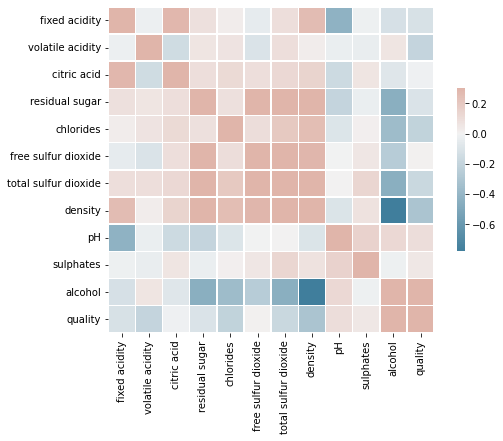

In [45]:
corr = df_vin.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
y_df = df_vin['quality']

In [47]:
df_vin.drop('quality', axis=1, inplace=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_vin, y_df, test_size=0.30, random_state=42)

In [49]:
scaler = StandardScaler()

In [50]:
normalized = scaler.fit_transform(X_train)

In [51]:
normalized

array([[-0.31132265, -0.28780076, -0.27645327, ..., -1.13031916,
         0.0940735 , -1.14685943],
       [ 1.10470658, -0.18935432,  1.30066456, ..., -1.06354794,
        -1.49278025,  0.64257527],
       [-0.66532995, -0.48469365, -0.02743466, ...,  0.87281754,
        -0.61119484,  0.56123733],
       ...,
       [ 0.86870171, -0.09090788,  1.54968316, ..., -1.13031916,
         0.35854912,  0.72391321],
       [-0.66532995, -0.3862472 , -0.35945947, ..., -0.12875081,
        -0.963829  ,  0.07320968],
       [ 1.45871389, -0.09090788,  0.13857774, ...,  0.2051053 ,
         1.24013454, -0.0894662 ]])

In [52]:
normalized_test = scaler.transform(X_test)

In [53]:
df_normalized = pd.DataFrame(normalized, columns=X_train.columns)

In [54]:
df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.311323,-0.287801,-0.276453,1.550669,0.294202,0.282113,1.067240,1.300650,-1.130319,0.094073,-1.146859
1,1.104707,-0.189354,1.300665,-0.625521,-0.861672,-0.431426,-1.219627,-0.709478,-1.063548,-1.492780,0.642575
2,-0.665330,-0.484694,-0.027435,-0.955835,-0.445558,-1.204425,-0.790840,-1.006054,0.872818,-0.611195,0.561237
3,-1.019337,-0.189354,-1.272528,0.112829,0.432906,0.876728,1.329277,0.611934,0.138334,-0.523036,-1.228197
4,1.222709,0.893557,-0.193447,-0.693527,-0.399323,-1.799040,-2.720384,-0.973101,0.004792,-1.140146,1.130603


In [55]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [56]:
neigh.fit(df_normalized, y_train)

KNeighborsClassifier()

In [57]:
y_pred2 = neigh.predict(normalized_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [58]:
y_pred2.shape

(1470,)

In [59]:
neigh.predict_proba(normalized_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0. , 0. , 0.4, ..., 0.4, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.4, 0.2, 0. ],
       [0. , 0. , 0. , ..., 0.4, 0. , 0.2],
       ...,
       [0. , 0. , 0.2, ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.8, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.8, 0. , 0. ]])

In [60]:
y_test.shape

(1470,)

In [61]:
for k in range(1,12):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(df_normalized, y_train)
  y_pred = neigh.predict(normalized_test)
  print(k, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1 0.6142857142857143
2 0.5530612244897959


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


3 0.5557823129251701


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


4 0.5530612244897959


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


5 0.5496598639455782


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


6 0.5428571428571428


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


7 0.5435374149659864


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


8 0.5537414965986395


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


9 0.5489795918367347


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


10 0.5482993197278911
11 0.5489795918367347


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [62]:
# Le score le plus précis, en utilisant l'algo des plus proches voisins sur le dataset du vin blanc, est lorsque k=1 ... pourtant j'ai essayé jusqu'à k=11
# j'imagine qu'on peut en conclure que l'algo knn n'est pas adapter à ce problème..

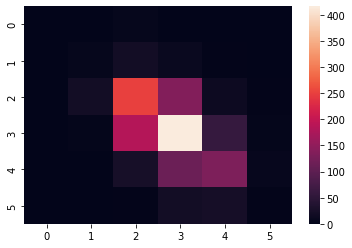

In [63]:
# Matrice de confusion
data = confusion_matrix(y_test, y_pred2)
ax = sns.heatmap(data=data)

# Regression logistic sur dataset vin

In [64]:
X, y = load_iris(return_X_y=True)

In [65]:
clf = LogisticRegression(random_state=0).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [66]:
clf.predict(X[:2, :])

array([0, 0])

In [67]:
clf.predict_proba(X[:2, :])

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08]])

In [68]:
clf.score(X, y)

0.9733333333333334